In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

#Tokenization and Lowercasing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...


True

In [23]:
df = pd.read_csv("./bbc_news.csv")

In [24]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [25]:
df.shape

(26304, 5)

In [26]:
# Drop one or more columns
columns_to_drop = ['title', 'pubDate', 'guid', 'link']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
df


DataFrame after dropping columns:


,description
0,The Ukrainian president says the country will ...
1,"Jeremy Bowen was on the frontline in Irpin, as..."
2,One of the world's biggest fertiliser firms sa...
3,The parents of the Manchester Arena bombing's ...
4,Consumers are feeling the impact of higher ene...
...,...
26299,It is thought more than 100 Israelis are still...
26300,Hamas accuses Israel of causing the damage to ...
26301,Writer and literary scholar Refaat Alareer was...
26302,Find out how much has changed in the Gaza Stri...


In [27]:
df['tokenized_text'] = df['description'].apply(lambda x: word_tokenize(str(x).lower()))
#This line tokenizes the text in the 'text' column, converts each word to lowercase, and creates a new column 'tokenized_text' containing lists of tokens for each article.

In [28]:
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
#Stopwords (common words like 'and', 'the', etc.) are removed from the tokenized text, and the result is stored in a new column 'filtered_text'.

In [31]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['filtered_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#Lemmatization reduces words to their base or root form, helping to standardize variations. The lemmatized text is stored in a new column 'lemmatized_text'.

In [32]:
df['preprocessed_text'] = df['lemmatized_text'].apply(' '.join)
#The lemmatized text is converted back to a single string per article and stored in the 'preprocessed_text' column.

In [33]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'])
#TF-IDF vectorization converts the preprocessed text into numerical vectors, representing the importance of each word in the context of the entire corpus.

In [34]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
#Cosine similarity is calculated between each pair of articles based on their TF-IDF vectors. 

In [35]:
df

,description,tokenized_text,filtered_text,lemmatized_text,preprocessed_text
0,The Ukrainian president says the country will ...,"[the, ukrainian, president, says, the, country...","[ukrainian, president, says, country, forgive,...","[ukrainian, president, say, country, forgive, ...",ukrainian president say country forgive forget...
1,"Jeremy Bowen was on the frontline in Irpin, as...","[jeremy, bowen, was, on, the, frontline, in, i...","[jeremy, bowen, frontline, irpin, ,, residents...","[jeremy, bowen, frontline, irpin, ,, resident,...","jeremy bowen frontline irpin , resident came r..."
2,One of the world's biggest fertiliser firms sa...,"[one, of, the, world, 's, biggest, fertiliser,...","[one, world, 's, biggest, fertiliser, firms, s...","[one, world, 's, biggest, fertiliser, firm, sa...",one world 's biggest fertiliser firm say confl...
3,The parents of the Manchester Arena bombing's ...,"[the, parents, of, the, manchester, arena, bom...","[parents, manchester, arena, bombing, 's, youn...","[parent, manchester, arena, bombing, 's, young...",parent manchester arena bombing 's youngest vi...
4,Consumers are feeling the impact of higher ene...,"[consumers, are, feeling, the, impact, of, hig...","[consumers, feeling, impact, higher, energy, c...","[consumer, feeling, impact, higher, energy, co...",consumer feeling impact higher energy cost fue...
...,...,...,...,...,...
26299,It is thought more than 100 Israelis are still...,"[it, is, thought, more, than, 100, israelis, a...","[thought, 100, israelis, still, held, hostage,...","[thought, 100, israeli, still, held, hostage, ...",thought 100 israeli still held hostage gaza 7 ...
26300,Hamas accuses Israel of causing the damage to ...,"[hamas, accuses, israel, of, causing, the, dam...","[hamas, accuses, israel, causing, damage, medi...","[hamas, accuses, israel, causing, damage, medi...",hamas accuses israel causing damage medieval o...
26301,Writer and literary scholar Refaat Alareer was...,"[writer, and, literary, scholar, refaat, alare...","[writer, literary, scholar, refaat, alareer, k...","[writer, literary, scholar, refaat, alareer, k...",writer literary scholar refaat alareer killed ...
26302,Find out how much has changed in the Gaza Stri...,"[find, out, how, much, has, changed, in, the, ...","[find, much, changed, gaza, strip, since, isra...","[find, much, changed, gaza, strip, since, isra...",find much changed gaza strip since israel bega...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        26304 non-null  object
 1   tokenized_text     26304 non-null  object
 2   filtered_text      26304 non-null  object
 3   lemmatized_text    26304 non-null  object
 4   preprocessed_text  26304 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [54]:
sample_size = 1000 
random_sample = df.sample(n=sample_size)
random_sample


,description,tokenized_text,filtered_text,lemmatized_text,preprocessed_text
2331,"As the city of Mykolaiv is shelled, the pieces...","[as, the, city, of, mykolaiv, is, shelled, ,, ...","[city, mykolaiv, shelled, ,, pieces, artillery...","[city, mykolaiv, shelled, ,, piece, artillery,...","city mykolaiv shelled , piece artillery left b..."
12177,The US company says the levy on its profits wi...,"[the, us, company, says, the, levy, on, its, p...","[us, company, says, levy, profits, discourage,...","[u, company, say, levy, profit, discourage, fu...",u company say levy profit discourage future in...
17073,"Mae Muller, Victor Vernicos and Gustaph answer...","[mae, muller, ,, victor, vernicos, and, gustap...","[mae, muller, ,, victor, vernicos, gustaph, an...","[mae, muller, ,, victor, vernicos, gustaph, an...","mae muller , victor vernicos gustaph answer si..."
1558,"Taxes and bills are rising, so how do small bu...","[taxes, and, bills, are, rising, ,, so, how, d...","[taxes, bills, rising, ,, small, businesses, -...","[tax, bill, rising, ,, small, business, -, alr...","tax bill rising , small business - already hit..."
10382,"Young campaigners say they are calling out ""gr...","[young, campaigners, say, they, are, calling, ...","[young, campaigners, say, calling, ``, greenwa...","[young, campaigner, say, calling, ``, greenwas...",young campaigner say calling `` greenwashing '...
...,...,...,...,...,...
3,The parents of the Manchester Arena bombing's ...,"[the, parents, of, the, manchester, arena, bom...","[parents, manchester, arena, bombing, 's, youn...","[parent, manchester, arena, bombing, 's, young...",parent manchester arena bombing 's youngest vi...
14385,The Uruguayan also worked on Tokyo's Internati...,"[the, uruguayan, also, worked, on, tokyo, 's, ...","[uruguayan, also, worked, tokyo, 's, internati...","[uruguayan, also, worked, tokyo, 's, internati...",uruguayan also worked tokyo 's international f...
3365,European countries have taken different approa...,"[european, countries, have, taken, different, ...","[european, countries, taken, different, approa...","[european, country, taken, different, approach...",european country taken different approaching h...
7164,"The men, aged 62 and 51, are charged with offe...","[the, men, ,, aged, 62, and, 51, ,, are, charg...","[men, ,, aged, 62, 51, ,, charged, offences, i...","[men, ,, aged, 62, 51, ,, charged, offence, in...","men , aged 62 51 , charged offence including d..."


In [55]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(random_sample['preprocessed_text'])
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)


<AxesSubplot: >

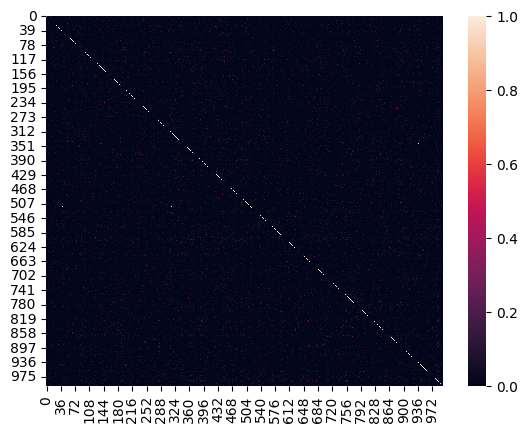

In [56]:
sns.heatmap(cosine_similarities)